## Student Grades Prediction

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades.

### Importing Data set

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


#### Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

-CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam.

#### Predict - 
CGPA of a student based on different grades in four years.

Since our dataset has categorical values, let's convert it to numerical by using Ordinal Encoder.

In [3]:
#Encoding categorical column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


We hav successfully encoded the values of the dataset. Let's move ahead.

Here, Seat No. is basically the serial no so we don't need it. Let's just remove it.

In [4]:
df.drop(['Seat No.'], axis=1, inplace=True)

In [5]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448


We have deleted the column, let's move ahead.

### Exploratory Data Analysis (EDA)

In [6]:
#Checking the shape of the data set
df.shape

(571, 42)

We can see our dataset contains 571 rows and 43 columns, out of which 1 column is our target variable and the rest are features.

In [7]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     570 non-null    float64
 3   HS-105/12  570 non-null    float64
 4   MT-111     569 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     569 non-null    float64
 7   EL-102     569 non-null    float64
 8   EE-119     569 non-null    float64
 9   ME-107     569 non-null    float64
 10  CS-107     569 non-null    float64
 11  HS-205/20  566 non-null    float64
 12  MT-222     566 non-null    float64
 13  EE-222     564 non-null    float64
 14  MT-224     564 non-null    float64
 15  CS-210     564 non-null    float64
 16  CS-211     566 non-null    float64
 17  CS-203     566 non-null    float64
 18  CS-214     565 non-null    float64
 19  EE-217     565 non-null    float64
 20  CS-212    

We can see our datas set contains 41 object data and 1 float data.

In [8]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,570.000000,570.000000,569.000000,571.000000,569.000000,569.000000,569.000000,569.000000,...,561.000000,559.000000,559.000000,559.000000,486.000000,558.000000,558.000000,557.000000,492.000000,571.000000
mean,3.781086,5.071804,2.903509,4.249123,3.903339,2.838879,4.130053,3.966608,3.892794,4.789104,...,4.126560,4.831843,3.506261,5.436494,3.156379,2.453405,3.899642,4.016158,3.217480,2.954888
std,3.046895,2.785317,2.964848,3.198370,2.991680,2.696709,2.729074,3.034533,2.659841,3.147403,...,3.366859,2.769584,2.969296,2.735501,2.638383,2.501091,2.393281,2.812758,2.471726,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,4.750000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


Here, we get the statistical information about the columns present in our dataset.

In [9]:
#Checking for missing values
df.isna().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

We can see there are a lot of missing values in our dataset. Let's deal with it.

In [37]:
df['CY-105'] = df['CY-105'].fillna(df['CY-105'].mean())
df['HS-105/12'] = df['HS-105/12'].fillna(df['HS-105/12'].mean())
df['MT-111'] = df['MT-111'].fillna(df['MT-111'].mean())
df['CS-106'] = df['CS-106'].fillna(df['CS-106'].mean())
df['EL-102'] = df['EL-102'].fillna(df['EL-102'].mean())
df['EE-119'] = df['EE-119'].fillna(df['EE-119'].mean())
df['ME-107'] = df['ME-107'].fillna(df['ME-107'].mean())
df['CS-107'] = df['CY-105'].fillna(df['CY-105'].mean())
df['HS-205/20'] = df['HS-205/20'].fillna(df['HS-205/20'].mean())
df['MT-222'] = df['MT-222'].fillna(df['MT-222'].mean())
df['EE-222'] = df['EE-222'].fillna(df['EE-222'].mean())
df['MT-224'] = df['MT-224'].fillna(df['MT-224'].mean())
df['CS-210'] = df['CS-210'].fillna(df['CS-210'].mean())
df['CS-211'] = df['CS-211'].fillna(df['CS-211'].mean())
df['CS-203'] = df['CS-203'].fillna(df['CS-203'].mean())
df['CS-214'] = df['CS-214'].fillna(df['CS-214'].mean())
df['EE-217'] = df['EE-217'].fillna(df['EE-217'].mean())
df['CS-212'] = df['CS-212'].fillna(df['CS-212'].mean())
df['CS-215'] = df['CS-215'].fillna(df['CS-215'].mean())
df['MT-331'] = df['MT-331'].fillna(df['MT-331'].mean())
df['EF-303'] = df['EF-303'].fillna(df['EF-303'].mean())
df['HS-304'] = df['HS-304'].fillna(df['HS-304'].mean())
df['CS-301'] = df['CS-301'].fillna(df['CS-301'].mean())
df['CS-302'] = df['CS-302'].fillna(df['CS-302'].mean())
df['TC-383'] = df['TC-383'].fillna(df['TC-383'].mean())
df['MT-442'] = df['MT-442'].fillna(df['MT-442'].mean())
df['EL-332'] = df['EL-332'].fillna(df['EL-332'].mean())
df['CS-318'] = df['CS-318'].fillna(df['CS-318'].mean())
df['CS-306'] = df['CS-306'].fillna(df['CS-306'].mean())
df['CS-312'] = df['CS-312'].fillna(df['CS-312'].mean())
df['CS-317'] = df['CS-317'].fillna(df['CS-317'].mean())
df['CS-403'] = df['CS-403'].fillna(df['CS-403'].mean())
df['CS-421'] = df['CS-421'].fillna(df['CS-421'].mean())
df['CS-406'] = df['CS-406'].fillna(df['CS-406'].mean())
df['CS-414'] = df['CS-414'].fillna(df['CS-414'].mean())
df['CS-419'] = df['CS-419'].fillna(df['CS-419'].mean())
df['CS-423'] = df['CS-423'].fillna(df['CS-423'].mean())
df['CS-412'] = df['CS-412'].fillna(df['CS-412'].mean())


In [39]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

We have successfully removed all the null values present in our dataset.

In [40]:
#Checking for unique values
df.nunique()

PH-121        13
HS-101        12
CY-105        14
HS-105/12     14
MT-111        14
CS-105        11
CS-106        14
EL-102        14
EE-119        13
ME-107        14
CS-107        14
HS-205/20     14
MT-222        15
EE-222        14
MT-224        15
CS-210        15
CS-211        15
CS-203        14
CS-214        14
EE-217        14
CS-212        13
CS-215        15
MT-331        13
EF-303        13
HS-304        15
CS-301        13
CS-302        12
TC-383        13
MT-442        13
EL-332        14
CS-318        15
CS-306        14
CS-312        15
CS-317        13
CS-403        12
CS-421        14
CS-406        15
CS-414        14
CS-419        13
CS-423        13
CS-412        14
CGPA         491
dtype: int64

In [41]:
#Checking the value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2.0     112
0.0     111
4.0      61
3.0      57
5.0      56
9.0      44
6.0      33
7.0      31
10.0     22
1.0      22
8.0      19
12.0      2
11.0      1
Name: PH-121, dtype: int64


2.0     82
5.0     78
6.0     68
3.0     63
4.0     59
8.0     50
7.0     47
9.0     45
0.0     38
10.0    36
1.0      4
11.0     1
Name: HS-101, dtype: int64


0.000000     177
2.000000     120
4.000000      50
3.000000      49
5.000000      42
9.000000      31
1.000000      31
6.000000      19
7.000000      17
8.000000      16
10.000000     14
12.000000      3
2.903509       1
11.000000      1
Name: CY-105, dtype: int64


0.000000     96
2.000000     75
4.000000     70
3.000000     57
9.000000     45
6.000000     41
5.000000     40
7.000000     39
8.000000     36
10.000000    34
1.000000     34
12.000000     2
4.249123      1
11.000000     1
Name: HS-105/12, dtype: int64


2.000000     105
0.000000     100
5.000000      70
4.000000      62
3.000000      55
8.000000      39
7.000000      33
6.000000    

### Checking for Correlation

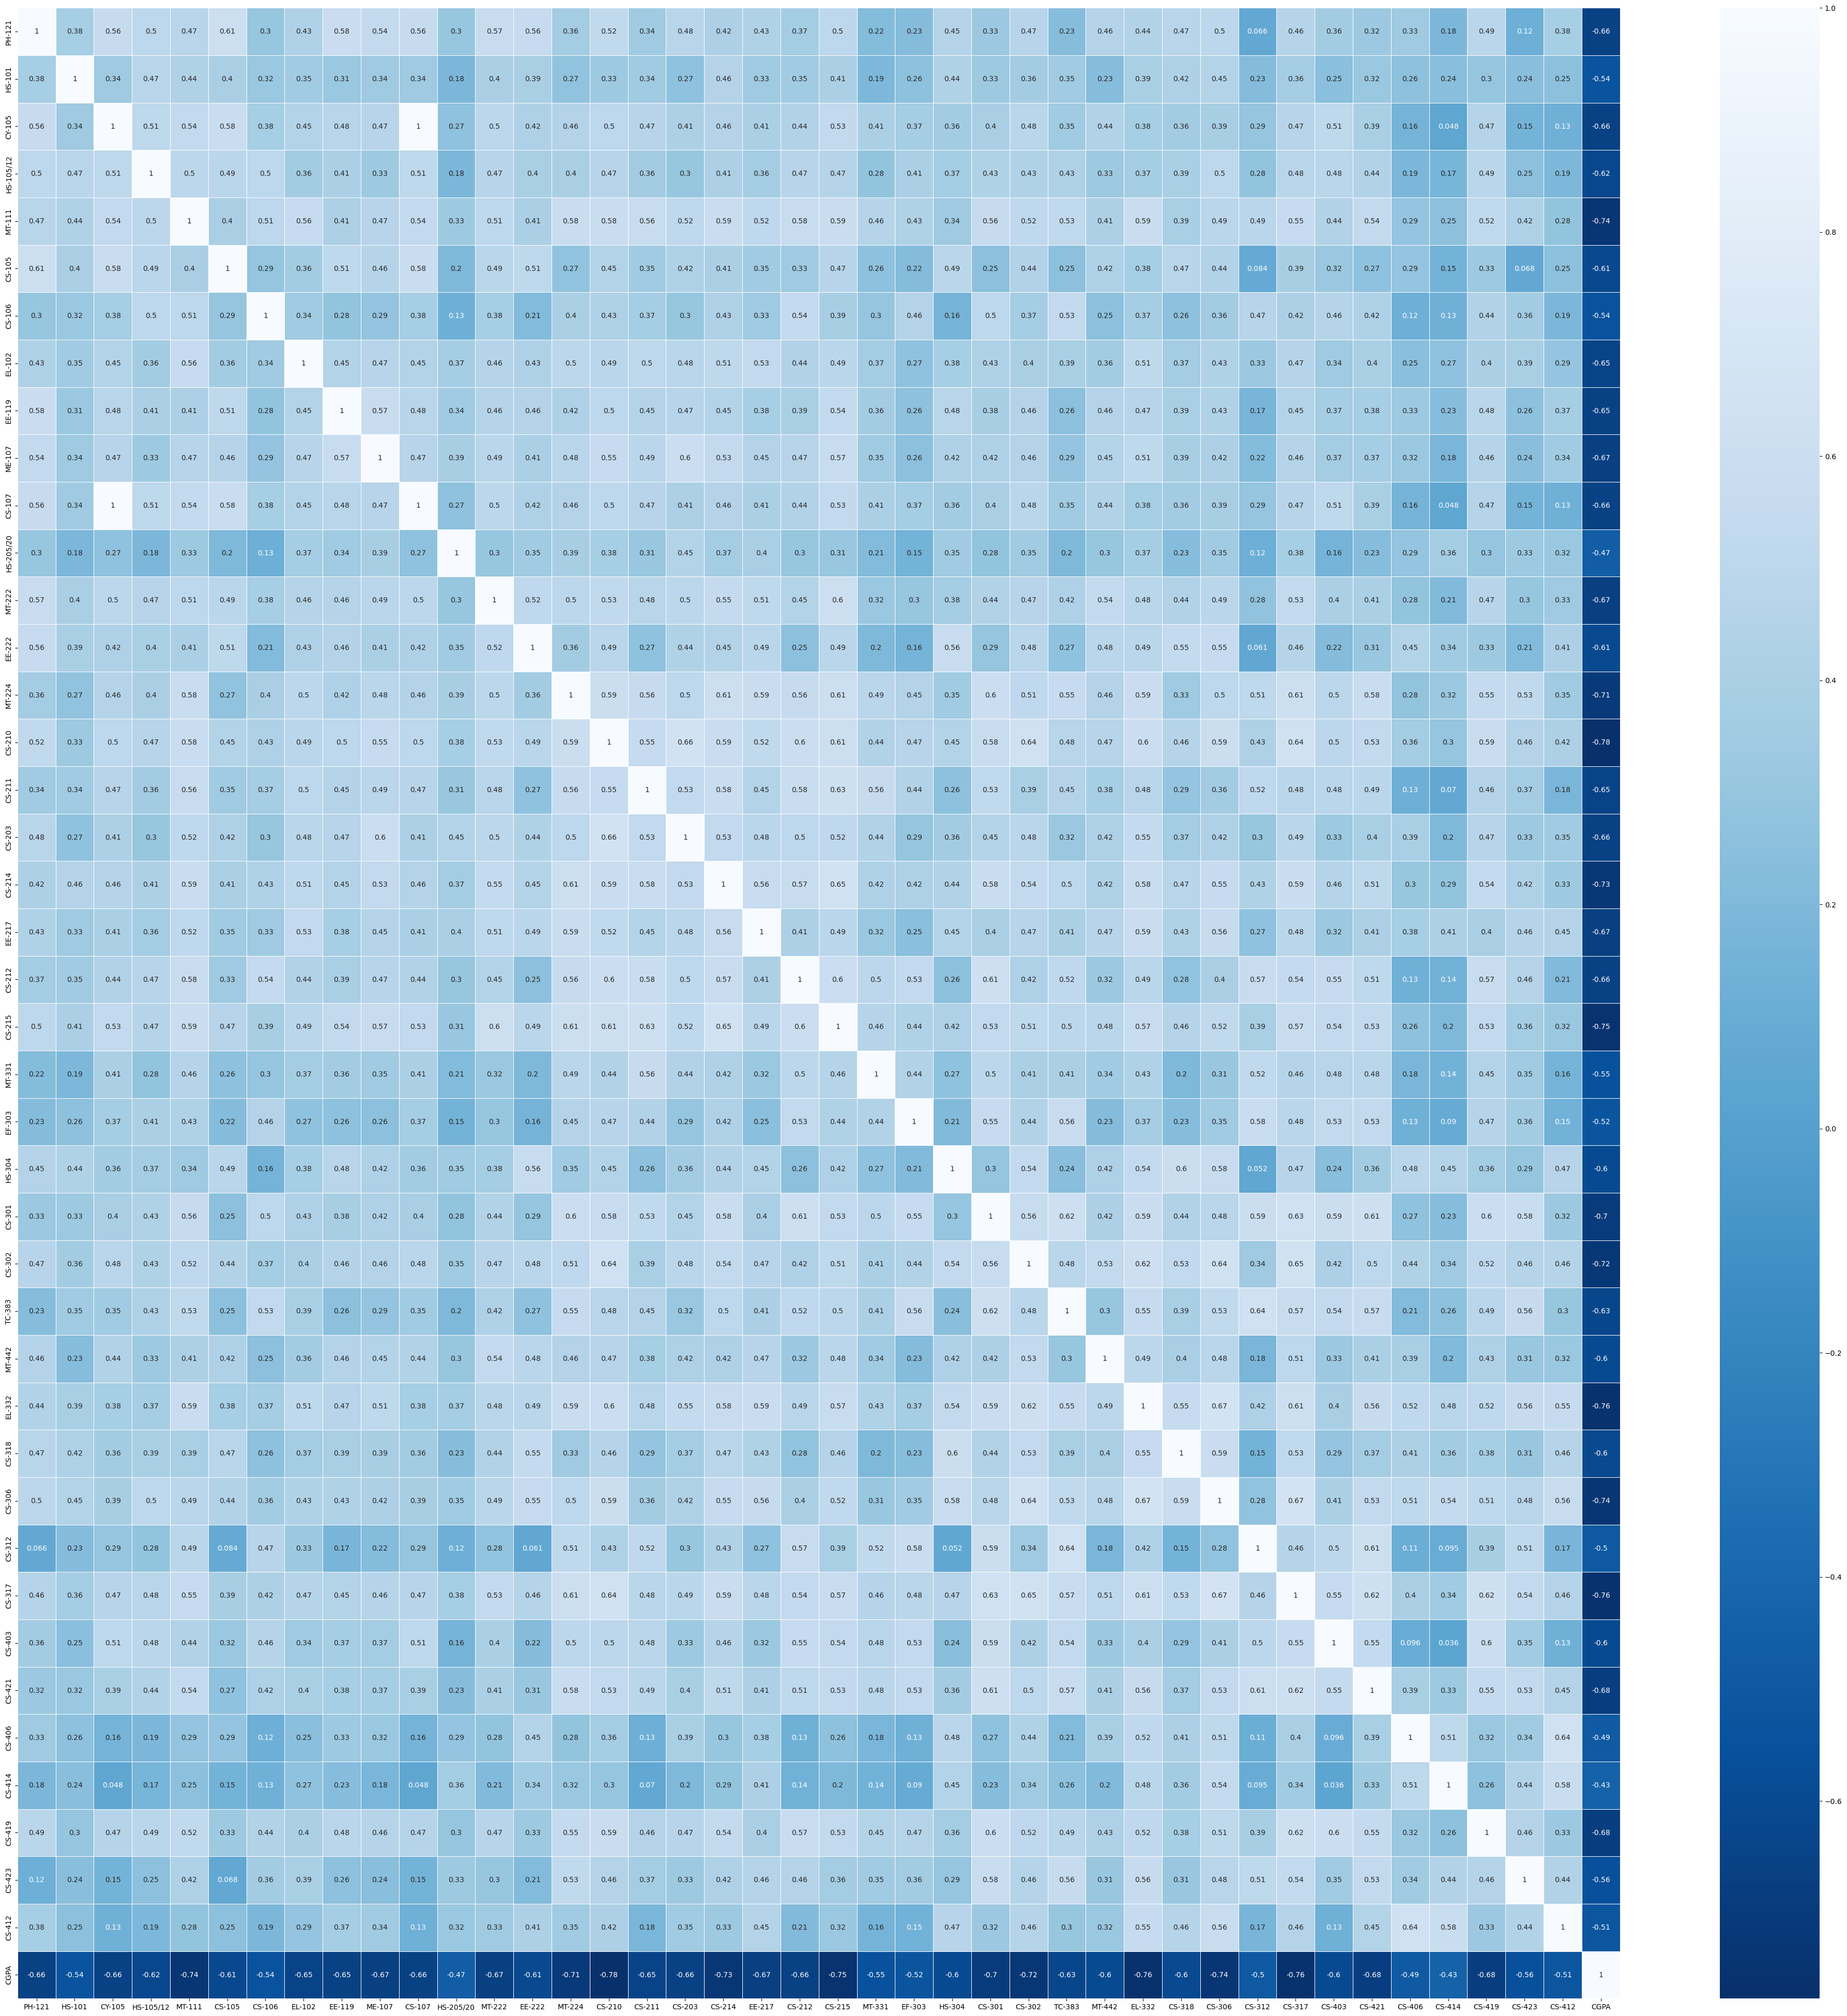

In [42]:
#Let's plot a heatmap for visualizing the correlation between features and label
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='Blues_r')
plt.show()

From the correlation heatmap we can see that there is a negative correlation between CGPA and all the features.

In [43]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.561257,0.503328,0.473865,0.609990,0.300326,0.428904,0.583942,0.539628,...,0.065546,0.462357,0.361424,0.322118,0.334384,0.184295,0.490516,0.120201,0.376729,-0.663135
HS-101,0.382436,1.000000,0.335929,0.474642,0.435802,0.400713,0.315237,0.352473,0.313500,0.340283,...,0.226366,0.363525,0.248781,0.318699,0.262115,0.242860,0.298372,0.241878,0.253986,-0.537170
CY-105,0.561257,0.335929,1.000000,0.509059,0.540425,0.582351,0.381355,0.449477,0.477587,0.472656,...,0.294275,0.470400,0.513598,0.389937,0.157141,0.047853,0.465035,0.152447,0.127349,-0.662887
HS-105/12,0.503328,0.474642,0.509059,1.000000,0.495679,0.487617,0.501480,0.360955,0.409977,0.327167,...,0.284353,0.478258,0.482200,0.440861,0.185272,0.166302,0.486979,0.254651,0.188988,-0.620435
MT-111,0.473865,0.435802,0.540425,0.495679,1.000000,0.399073,0.506010,0.555253,0.410799,0.472215,...,0.489438,0.554495,0.442927,0.535777,0.289468,0.251900,0.523101,0.420303,0.283890,-0.737130
CS-105,0.609990,0.400713,0.582351,0.487617,0.399073,1.000000,0.292389,0.359414,0.512131,0.459748,...,0.083694,0.386140,0.315958,0.265798,0.286342,0.151762,0.332057,0.067729,0.251044,-0.613169
CS-106,0.300326,0.315237,0.381355,0.501480,0.506010,0.292389,1.000000,0.342688,0.278973,0.291643,...,0.471995,0.415936,0.458847,0.419784,0.119781,0.130931,0.442221,0.357555,0.185430,-0.542916
EL-102,0.428904,0.352473,0.449477,0.360955,0.555253,0.359414,0.342688,1.000000,0.451465,0.468407,...,0.325742,0.465479,0.340339,0.396015,0.246583,0.271220,0.403475,0.393442,0.286259,-0.649374
EE-119,0.583942,0.313500,0.477587,0.409977,0.410799,0.512131,0.278973,0.451465,1.000000,0.573726,...,0.173792,0.445123,0.371199,0.377628,0.330949,0.233401,0.483184,0.260564,0.370567,-0.653498
ME-107,0.539628,0.340283,0.472656,0.327167,0.472215,0.459748,0.291643,0.468407,0.573726,1.000000,...,0.217957,0.462002,0.366446,0.369621,0.319081,0.178727,0.462495,0.241351,0.343230,-0.669373


### Data Visualization

In [44]:
#Visualizing data using dist plot
plt.figure(figsize= (100,75), facecolor='white')
plotnumber=1
for col in df:
    if plotnumber<=42:
        ax = plt.subplot(7,6, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation=0, fontsize=8)
    plotnumber+=1
    plt.tight_layout()

### Separating Features and Label

In [45]:
x = df.drop("CGPA", axis=1)
y = df["CGPA"]

In [46]:
print(x.shape)
print(y.shape)

(571, 41)
(571,)


In [47]:
y.value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

### Feature Scaling using Standard Scaler 

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.721991,0.548389,1.372963,2.657832,1.789175,1.332669,0.417365,1.022864,...,0.654698,1.161705,1.157159,1.530930,0.947978,-0.475565,-0.993185,1.734677,-0.366108,-0.531176
1,-1.242052,1.411559,2.397746,1.488014,0.367537,1.173242,1.789175,-1.310604,2.302135,1.341424,...,1.710986,1.761537,1.522406,0.849569,1.317776,-0.475565,1.030910,0.888567,0.714752,-0.094885
2,-1.242052,-0.744483,-0.981031,0.235181,0.032395,-1.053643,0.319611,0.011033,-0.713496,-0.888497,...,-0.753686,-0.337873,-0.669075,-1.194515,0.208383,-1.298071,-0.993185,-1.649763,-0.726395,-1.403760
3,1.714365,0.692879,2.397746,1.488014,1.708105,-0.311348,2.156566,1.332669,1.925181,0.704303,...,1.358890,1.761537,0.426666,2.212291,0.947978,0.758195,0.221272,1.311622,1.075039,1.650282
4,-0.585070,-1.103823,-0.305275,-0.078027,-1.308173,-1.053643,-0.782562,0.011033,-1.467404,-0.888497,...,-0.753686,0.261958,-0.303828,0.168207,-0.161414,-0.475565,-0.993185,-0.803653,-0.726395,-1.403760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.981031,-0.704444,-0.973031,-1.053643,-0.782562,-0.649785,-1.090450,-0.251377,...,-0.049494,-0.637789,-1.034321,-1.194515,-2.010402,-1.298071,0.626091,0.042457,-0.366108,-1.403760
567,-0.913561,-1.822504,-0.981031,-1.330861,-1.308173,-1.053643,-1.517344,-0.649785,-1.467404,-1.525618,...,-0.753686,-0.037957,-0.303828,-1.194515,-2.010402,-0.475565,0.221272,-0.803653,0.714752,-0.531176
568,-0.256579,-1.822504,-0.305275,-0.078027,-1.308173,-1.053643,-1.517344,-1.310604,-1.467404,-0.569937,...,-0.049494,-0.637789,-0.669075,-1.194515,-0.531212,-1.298071,1.435729,0.042457,-0.726395,-0.531176
569,-1.242052,-0.385142,2.059868,-1.330861,1.708105,2.657832,0.319611,1.332669,0.417365,1.022864,...,-0.049494,1.461621,-0.669075,-0.172473,0.947978,2.403209,1.435729,-0.380598,0.354465,1.213991


We have successfully scaled our features to remove biasness.

### Checking  for VIF

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,VIF values,Features
0,2.880807,PH-121
1,1.752847,HS-101
2,inf,CY-105
3,2.263724,HS-105/12
4,2.642389,MT-111
5,2.392070,CS-105
6,1.916765,CS-106
7,1.955110,EL-102
8,2.198310,EE-119
9,2.308579,ME-107


We got VIF values <10 that means everything is alright. We can move further.

### Checking for skewness

In [79]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.981105
HS-105/12    0.322796
MT-111       0.480121
CS-105       0.930769
CS-106       0.635318
EL-102       0.496377
EE-119       0.570158
ME-107       0.101909
CS-107       0.981105
HS-205/20    0.888830
MT-222       0.178750
EE-222       0.753403
MT-224       0.412283
CS-210       0.709481
CS-211       0.099796
CS-203       0.259832
CS-214       0.023352
EE-217       0.712091
CS-212       0.399317
CS-215       0.144729
MT-331       0.617889
EF-303       0.357333
HS-304       0.522265
CS-301       0.388341
CS-302       0.578991
TC-383       0.316091
MT-442       0.853815
EL-332       0.435999
CS-318       0.332496
CS-306       0.401096
CS-312       0.416935
CS-317       0.144586
CS-403       0.603938
CS-421       0.141523
CS-406       1.385275
CS-414       1.288571
CS-419       0.473725
CS-423       0.491719
CS-412       1.188899
CGPA        -0.497203
dtype: float64

In [107]:
#Removing skewness using cbrt method
df["CY-105"] = np.cbrt(df["CY-105"])
df["CS-105"] = np.cbrt(df["CS-105"])
df["CS-106"] = np.cbrt(df["CS-106"])
df["CS-107"] = np.cbrt(df["CS-107"])
df["HS-205/20"] = np.cbrt(df["HS-205/20"])
df["EE-222"] = np.cbrt(df["EE-222"])
df["CS-210"] = np.cbrt(df["CS-210"])
df["EE-217"] = np.cbrt(df["EE-217"])
df["MT-331"] = np.cbrt(df["MT-331"])
df["MT-442"] = np.cbrt(df["MT-442"])
df["CS-403"] = np.cbrt(df["CS-403"])

In [108]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105      -0.770104
HS-105/12    0.322796
MT-111       0.480121
CS-105      -1.007291
CS-106      -2.534730
EL-102       0.496377
EE-119       0.570158
ME-107       0.101909
CS-107      -0.770104
HS-205/20   -1.401356
MT-222       0.178750
EE-222      -1.317366
MT-224       0.412283
CS-210      -1.614740
CS-211       0.099796
CS-203       0.259832
CS-214       0.023352
EE-217      -1.667327
CS-212       0.399317
CS-215       0.144729
MT-331      -0.844872
EF-303       0.357333
HS-304       0.522265
CS-301       0.388341
CS-302       0.578991
TC-383       0.316091
MT-442      -0.719786
EL-332       0.435999
CS-318       0.332496
CS-306       0.401096
CS-312       0.416935
CS-317       0.144586
CS-403      -0.803102
CS-421       0.141523
CS-406       1.385275
CS-414       1.288571
CS-419       0.473725
CS-423       0.491719
CS-412       1.188899
CGPA        -0.497203
dtype: float64

Everything looks good. Now we can train our model.

### Model Training

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [52]:
#Finding the best random state
maxR2 = 0
maxRS = 0
for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxR2:
        maxR2=acc
        maxRS=i
print("Maximum r2 score is ", maxR2, "on Random_state ", maxRS)

Maximum r2 score is  0.9807713754431425 on Random_state  382


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=382)

In [54]:
x_train

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
16,2.0,8.0,0.0,10.0,2.0,0.0,3.0,2.0,2.0,0.0,...,5.0,6.0,5.0,3.0,7.0,4.000000,2.0,5.0,3.0,2.0
99,7.0,6.0,2.0,5.0,5.0,8.0,9.0,5.0,7.0,6.0,...,6.0,10.0,5.0,10.0,8.0,2.000000,4.0,6.0,9.0,4.0
108,2.0,6.0,0.0,2.0,4.0,2.0,10.0,2.0,0.0,2.0,...,4.0,8.0,3.0,5.0,5.0,2.000000,0.0,2.0,2.0,0.0
357,3.0,2.0,0.0,2.0,2.0,2.0,4.0,1.0,3.0,4.0,...,0.0,1.0,4.0,2.0,3.0,3.156379,0.0,4.0,0.0,4.0
200,0.0,7.0,2.0,2.0,2.0,0.0,3.0,5.0,7.0,3.0,...,2.0,8.0,8.0,8.0,10.0,2.000000,2.0,8.0,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,3.0,8.0,3.0,10.0,5.0,7.0,7.0,6.0,2.0,8.0,...,5.0,5.0,8.0,6.0,7.0,2.000000,2.0,5.0,5.0,2.0
518,4.0,9.0,0.0,2.0,4.0,0.0,3.0,10.0,4.0,5.0,...,6.0,2.0,3.0,0.0,4.0,3.000000,5.0,4.0,7.0,3.0
421,2.0,4.0,5.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,...,4.0,1.0,5.0,2.0,3.0,3.156379,0.0,6.0,2.0,3.0
176,2.0,6.0,4.0,3.0,4.0,0.0,2.0,3.0,2.0,10.0,...,3.0,10.0,10.0,10.0,9.0,3.000000,4.0,6.0,10.0,4.0


In [55]:
y_train

16     3.248
99     2.396
108    3.195
357    3.694
200    2.608
       ...  
62     2.468
518    2.951
421    3.290
176    2.528
395    3.094
Name: CGPA, Length: 428, dtype: float64

### Model Building

In [56]:
#Importing differenet regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.svm import SVR

#### Linear Regression

In [57]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_LR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score: 0.9807713754431425
R2 Score on training data: 94.09064890706928
Mean Absolute Error: 0.06332025271134498
Mean Squared Error: 0.007490201413256188
Root Mean Squared Error: 0.08654594972184537


#### Random Forest Regressor

In [58]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_RFR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 Score: 0.9597011274926603
R2 Score on training data: 99.03229637708834
Mean Absolute Error: 0.09360622377622368
Mean Squared Error: 0.015697777597902068
Root Mean Squared Error: 0.1252907721977244


#### Decision Tree Regressor

In [59]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)
pred_train = DT.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_DT))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_DT))
print('Mean Squared Error:', mean_squared_error(y_test, pred_DT))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_DT)))

R2 Score: 0.872903640253855
R2 Score on training data: 100.0
Mean Absolute Error: 0.17031468531468535
Mean Squared Error: 0.04950834265734265
Root Mean Squared Error: 0.22250470255107566


#### KNeighbors Regressor

In [60]:
KN = KNeighborsRegressor()
KN.fit(x_train, y_train)
pred_KN = KN.predict(x_test)
pred_train = KN.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_KN))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_KN))
print('Mean Squared Error:', mean_squared_error(y_test, pred_KN))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_KN)))

R2 Score: 0.9663489775242626
R2 Score on training data: 93.57608850300737
Mean Absolute Error: 0.08941398601398602
Mean Squared Error: 0.013108214545454551
Root Mean Squared Error: 0.11449111120717866


#### Lasso

In [61]:
LS = Lasso()
LS.fit(x_train, y_train)
pred_LS = LS.predict(x_test)
pred_train = LS.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_LS))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LS))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LS))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LS)))

R2 Score: 0.37339048826972143
R2 Score on training data: 34.72027065090239
Mean Absolute Error: 0.4207189885118709
Mean Squared Error: 0.24408565659201537
Root Mean Squared Error: 0.49405025715205875


#### Ridge

In [62]:
RD = Ridge()
RD.fit(x_train, y_train)
pred_RD = RD.predict(x_test)
pred_train = RD.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_RD))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RD))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 Score: 0.9807612248725619
R2 Score on training data: 94.0906249463309
Mean Absolute Error: 0.06334391170686053
Mean Squared Error: 0.007494155404759014
Root Mean Squared Error: 0.08656879001556517


#### Gradient Boosting Regressor

In [64]:
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
pred_GB = GB.predict(x_test)
pred_train = GB.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_GB))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GB))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GB))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_GB)))

R2 Score: 0.9681506055246946
R2 Score on training data: 99.58789800901694
Mean Absolute Error: 0.08474629218313326
Mean Squared Error: 0.012406419336177144
Root Mean Squared Error: 0.11138410719746845


#### Extra Trees Regressor

In [65]:
ET = ExtraTreesRegressor()
ET.fit(x_train, y_train)
pred_ET = ET.predict(x_test)
pred_train = ET.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_ET))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ET))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ET))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_ET)))

R2 Score: 0.9660729932015395
R2 Score on training data: 100.0
Mean Absolute Error: 0.08576202797202799
Mean Squared Error: 0.01321571979930072
Root Mean Squared Error: 0.114959644220486


#### SVR

In [66]:
SV = SVR()
SV.fit(x_train, y_train)
pred_SV = SV.predict(x_test)
pred_train = SV.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_SV))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_SV))
print('Mean Squared Error:', mean_squared_error(y_test, pred_SV))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_SV)))

R2 Score: 0.9665368604044924
R2 Score on training data: 96.5119063960612
Mean Absolute Error: 0.0781466877151942
Mean Squared Error: 0.013035027791463807
Root Mean Squared Error: 0.11417104620464773


We can see that our Linear Regression model works best with 98% R2 score. Great!

### Cross Validation score

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
#Linear Regression
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_LR) - score.mean())*100)

[0.94112044 0.95036064 0.93284833 0.97550132 0.90731916]
0.9414299783075026
Difference between R2 score and cross validation score is: 3.934139713563989


In [69]:
#Random Forest Regressor
score = cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_RFR) - score.mean())*100)

[0.94449299 0.92863424 0.9409987  0.94323277 0.88046409]
0.9275645568753538
Difference between R2 score and cross validation score is: 3.213657061730657


In [70]:
#Decision Tree Regressor
score = cross_val_score(DT, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_DT) - score.mean())*100)

[0.80361816 0.84316356 0.85787982 0.70480561 0.72785626]
0.7874646823018103
Difference between R2 score and cross validation score is: 8.54389579520447


In [71]:
#KNeighbors Regressor
score = cross_val_score(KN, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_KN) - score.mean())*100)

[0.91361218 0.94190184 0.91473433 0.94534277 0.87720244]
0.9185587106401585
Difference between R2 score and cross validation score is: 4.779026688410415


In [72]:
#Lasso
score = cross_val_score(LS, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_LS) - score.mean())*100)

[0.37158929 0.35091577 0.35095026 0.38926737 0.31013118]
0.3545707751860849
Difference between R2 score and cross validation score is: 1.8819713083636558


In [73]:
#Ridge 
score = cross_val_score(RD, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_RD) - score.mean())*100)

[0.94107043 0.95036682 0.93285594 0.97560883 0.90730885]
0.9414421750710427
Difference between R2 score and cross validation score is: 3.9319049801519235


In [74]:
#Gradient Boosting Regressor
score = cross_val_score(GB, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_GB) - score.mean())*100)

[0.96746417 0.94816343 0.95776597 0.94899034 0.91116376]
0.9467095348486219
Difference between R2 score and cross validation score is: 2.1441070676072704


In [75]:
#Extra Trees Regressor 
score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_ET) - score.mean())*100)

[0.94066256 0.95743656 0.96082838 0.95319815 0.89844691]
0.9421145120362034
Difference between R2 score and cross validation score is: 2.3958481165336054


In [76]:
#SVR
score = cross_val_score(SV, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_SV) - score.mean())*100)

[0.9255581  0.94178647 0.93015923 0.95933081 0.89146928]
0.9296607784590918
Difference between R2 score and cross validation score is: 3.6876081945400596


Here we can see Gradient Boosting Regressor works better with minimum difference between R2 score and cross validation score and gives 94.67% R2 score.

### Hyper parameter Tuning 

In [78]:
#Let's see if we can increase our score further.
from sklearn.model_selection import GridSearchCV

In [84]:
#GradientBoostingRegressor
parameters = {'criterion' : ['gini', 'entropy'],
             'learning_rate' : [0.1, 0.2, 0.3],
             'max_depths' : [0,10,20],
             'min_samples_split' : [-2, -1, 1, 2],
             'n_estimators' : [50, 100, 200, 300]}

In [94]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)

In [95]:
GCV = GradientBoostingRegressor(n_estimators=100, 
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0).fit(x_train, y_train)
GCV.score(x_test, y_test)

0.9482490724101454

In [96]:
GCV.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=1, random_state=0)

In [99]:
final_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=1, random_state=0)

In [100]:
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)
print('R2 score:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.9608003840058498
Mean Absolute Error: 0.09596285865876053
Mean Squared Error: 0.01526957990418369
Root Mean Squared Error: 0.12357014163698159


Yeah! We got 96% R2 score.

### Saving the model

In [101]:
import pickle

In [103]:
filename = 'Students_Grades.pkl'
pickle.dump(final_model, open(filename, 'wb'))
#Model saved

In [104]:
loaded_model = pickle.load(open ('Students_Grades.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

96.08003840058498


In [105]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
Predicted,3.714978,3.749991,2.826969,3.367011,2.699755,3.549625,2.503131,3.387054,2.620037,3.694236,...,1.878906,3.574782,2.641407,3.635366,3.509985,1.942342,2.000727,1.894621,3.650257,2.262431
Original,3.809000,3.856000,2.851000,3.335000,2.782000,3.443000,2.444000,3.396000,2.570000,3.769000,...,1.899000,3.645000,2.704000,3.759000,3.443000,1.658000,1.753000,1.763000,3.625000,2.343000


Completed!!!